In [ ]:
##################Class 1 Question 1#######################
# How do you handle duplicate values in a dataset in Python?

In [ ]:
Duplicate data can be problematic because they use up unnecessary amounts of memory 
and cause unneeded calculations to be performed when processing data. In addition, 
they can also skew analysis results.
We can drop duplicates by '.drop_duplicates()' method.

In [45]:
########################Python Method#########################
###################### NOT TO RUN ############################
import pandas as pd 

df = pd.merge(friend_request, request_accepted, how='left', left_on=('requester_id','sent_to_id'), right_on='requestor_id', 'acceptor_id')
total_request = df.count
total_accept = sum(pd.isnull(df['acceptor_id']))
rate = total_accept / total_accept
print(rate)

SyntaxError: positional argument follows keyword argument (<ipython-input-45-5e6462e37e08>, line 5)

In [14]:
##################Class 1 Question 2#######################
#You are given two tables - friend_request and request_accepted. 
#Friend_request contains requestor_id, time 
# and sent_to_id and request_accepted table contains 
# time, acceptor_id and requestor_id. 
# How will you determine the overall acceptance rate of requests? 

In [ ]:
########################SQL Method############################
###################### NOT TO RUN ############################
# I assume that the primary key of friend_request table should not be any
# any columns mentioned in the questions because each requestor can sent
# multiple time of requests and vice versa.

SELECT COUNT(a.acceptor_id)/ COUNT(r.requester_id) AS rate
FROM
(
SELECT DISTINCT r.requester_id, r.sent_to_id, a.acceptor_id, a.requestor_id      
FROM friend_request AS r
LEFT JOIN request_accepted AS a
  ON r.sent_to_id = a.acceptor_id 
    AND r.requester_id =a.requestor_id);

In [10]:
##################Class 1 Question 3#######################
################## Questions omitted #####################

In [97]:
# Import data
file_location = "/Users/linn/Desktop/Python Notebook/"
file_name = "orders_new.csv"
my_data = pd.read_csv(file_location + file_name)

In [98]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
##################Class 2 Question 1#######################
Similarly to PrintDailyTimeSeries() in the sample code, write a Python function called PrintCumulativeTimeSeries(). Specifically:

The function takes three inputs:
-	experiment_id
-	country
-	vertical

The function produces two outputs:
-	A time series chart showing the cumulative uplift 
      (hint: search for cumsum)
Print out the cumulative % uplift on revenue, experiment vs. control. 
       Hint: (red - blue) / blue %

In [99]:
import datetime
np.unique(my_data["experiment_id"])

array([12624548, 12624549])

In [100]:
# Define the 1st function
# for any given experiment_id, return a list group by date
def GetSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    return(series)


In [101]:
# test if it works
red = GetSeries(my_data,12624548)
blue = GetSeries(my_data,12624549)
print(red)
print(blue)


date
2017-04-01    55504.518743
2017-04-02    31317.138253
2017-04-03    31583.940583
2017-04-04    23615.742230
2017-04-05    30899.812674
2017-04-06    27768.181870
2017-04-07    32957.001652
Name: spend_usd, dtype: float64
date
2017-04-01    54019.941288
2017-04-02    34642.988992
2017-04-03    28645.762133
2017-04-04    27604.259313
2017-04-05    33149.441763
2017-04-06    29310.726245
2017-04-07    34640.122009
Name: spend_usd, dtype: float64


In [102]:
# Define the 2nd function
# for any two series, plot the time series
def PlotSeries(index_series, experiment_series, control_series):
    df = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series.tolist(), # a range of dates
        columns = ["experiment", "control"]
    )
    df.plot()

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 7 Text xticklabel objects>)

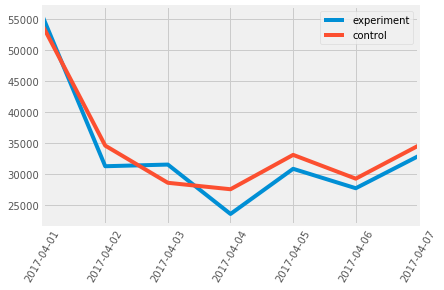

In [103]:
# test if this works
date_series = my_data.date
index_series = np.unique(date_series)
#index_series

PlotSeries(index_series, red, blue)
plt.xticks(rotation=60)

In [138]:
################# The answer for this question###################
# Define the 3rd function
def PrintCumulativeTimeSeries(experiment_ids, country, vertical):
    # make sure our x-axis is consistent
    date_series = my_data.date
    index_series = np.unique(date_series) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = my_data["spend_usd"][(my_data.experiment_id == experiment_ids[0]) 
                                                      & (my_data.country == country)
                                                      & (my_data.vertical == vertical)].cumsum()
    
    control_series = my_data["spend_usd"][(my_data.experiment_id == experiment_ids[1]) 
                                                      & (my_data.country == country)
                                                      & (my_data.vertical == vertical)].cumsum()
   
    PlotSeries(index_series, treatment_series, control_series)
    plt.xticks(rotation=60)
  

In [137]:
# Let's test it out!
PrintCumulativeTimeSeries([12624548,12624549], "US", "YOUTUBE")

UnboundLocalError: local variable 'my_data' referenced before assignment

In [134]:
my_data.vertical

0        ANDROID_APPS
1        ANDROID_APPS
2        ANDROID_APPS
3        ANDROID_APPS
4        ANDROID_APPS
5        ANDROID_APPS
6        ANDROID_APPS
7        ANDROID_APPS
8        ANDROID_APPS
9        ANDROID_APPS
10            YOUTUBE
11       ANDROID_APPS
12       ANDROID_APPS
13       ANDROID_APPS
14       ANDROID_APPS
15       ANDROID_APPS
16       ANDROID_APPS
17       ANDROID_APPS
18       ANDROID_APPS
19       ANDROID_APPS
20       ANDROID_APPS
21       ANDROID_APPS
22       ANDROID_APPS
23       ANDROID_APPS
24       ANDROID_APPS
25       ANDROID_APPS
26       ANDROID_APPS
27       ANDROID_APPS
28       ANDROID_APPS
29       ANDROID_APPS
             ...     
39928    ANDROID_APPS
39929           MUSIC
39930           MUSIC
39931           MUSIC
39932           MUSIC
39933    ANDROID_APPS
39934    ANDROID_APPS
39935    ANDROID_APPS
39936    ANDROID_APPS
39937    ANDROID_APPS
39938    ANDROID_APPS
39939    ANDROID_APPS
39940    ANDROID_APPS
39941    ANDROID_APPS
39942    A

In [133]:
treatment_series = my_data["spend_usd"][my_data.experiment_id == 12624548 
                                                      & str(my_data.country) == "US"
                                                      & str(my_data.vertical) == "YOUTUBE"].cumsum()
    
    

TypeError: unsupported operand type(s) for &: 'int' and 'str'

In [ ]:
##################Class 2 Question 2#######################
Using our data, draw a histogram which plots both US and JP data on the same plot. 

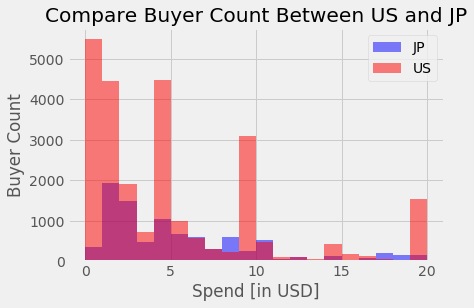

In [31]:
# Slicing data
my_series_jp = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "JP")]
my_series_us = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "US")]
plt.hist(my_series_jp, bins=20, color='blue',alpha=0.5,label='JP')
plt.hist(my_series_us, bins=20, color='red', alpha=0.5, label='US')

# Strings
xlab = 'Spend [in USD]'
ylab = 'Buyer Count'
title = 'Compare Buyer Distribution Between US and JP'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title) 

# Add a legend 
plt.legend(loc='upper right')

# Set style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# After customizing, display the plot
plt.show()


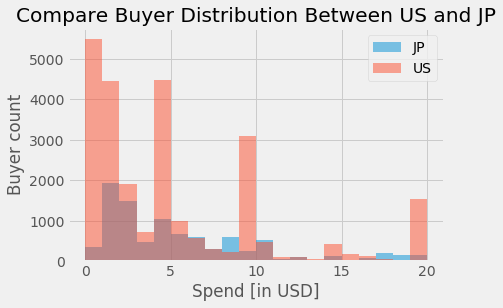

In [42]:
# Or use the method taught in class
fig, ax = plt.subplots()
ax.hist(my_series_jp, bins=20, alpha=0.5, label='JP')
ax.hist(my_series_us, bins=20,alpha=0.5, label='US')
ax.set_title("Compare Buyer Distribution Between US and JP")
ax.set_ylabel("Buyer count")
ax.set_xlabel("Spend [in USD]")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [ ]:
##################Class 2 Question 3#######################